## TP2
Ejercicio 1:

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importamos datos para ser analizados:

In [25]:
casos_df = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv")
camas_df = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv")
casos_df

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


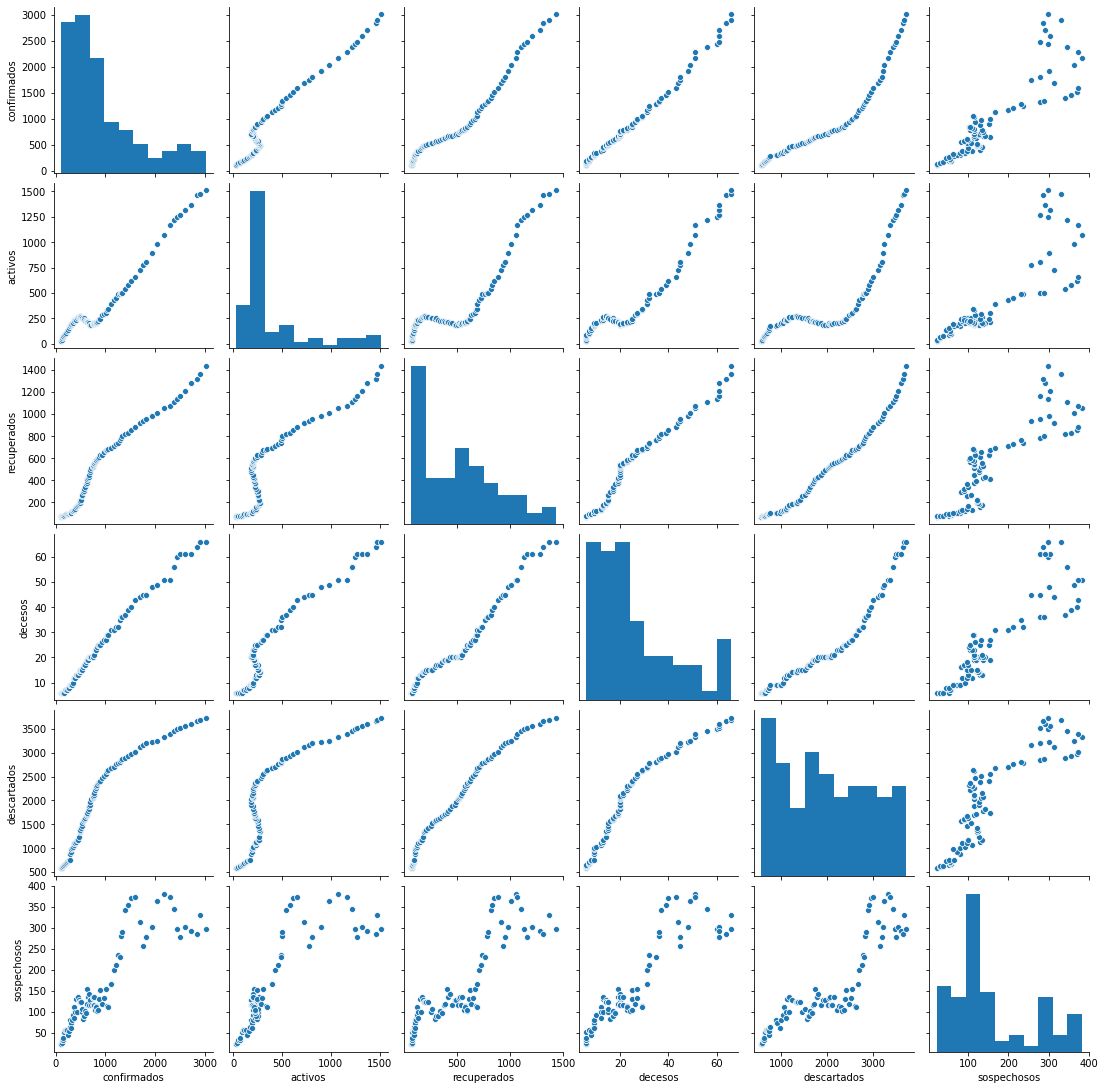

In [51]:
cols = ['confirmados','activos','recuperados','decesos','descartados','sospechosos']
sns.pairplot(casos_df[cols])

# Deteccion de valores atipicos
Problema: Los casos que vimos en clases y aquellos planteados en el notebook de /8_outlier_detection.ipynb la mayoria son orientados a problemas con distribuciones guassianas, aca intente el metodo basado en densidad de aplicaciones con ruido, que otro metodo me resultaria util para esta distribucion?

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

casos_df_scaled = StandardScaler().fit_transform(casos_df[cols].values)

db = DBSCAN(eps=0.7,min_samples=5).fit(casos_df_scaled)
labels =db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1])

Que son los 1?

In [56]:
pd.Series(labels).value_counts()

 0    78
 1     8
-1     2
dtype: int64

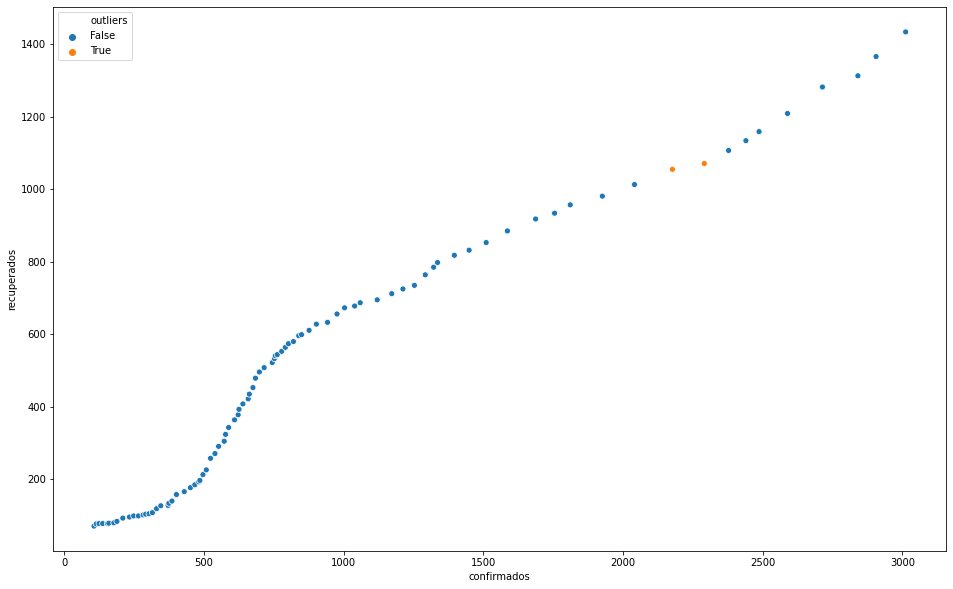

In [58]:
plt.figure(figsize=(16,10))
casos_df_outlier = casos_df
casos_df_outlier['outliers'] = [True if x == -1 else False for x in labels]

sns.scatterplot(x="confirmados",y="recuperados",hue='outliers',data=casos_df_outlier)

No lo veo muy viable este metodo